<a href="https://colab.research.google.com/github/solobala/IvanGame/blob/master/praktika_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Инициализация библиотек

In [ ]:
!pip install matplotlib

In [ ]:
!pip install pandas

In [ ]:
!pip install plotly

In [174]:
!pip install umap-learn

In [183]:
!pip install seaborn

In [182]:
import pandas as pd
import numpy as np
import plotly as pl
import plotly.graph_objects as go
import plotly.express as px
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
import datetime
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Контроль версий
print(mpl.__version__)

3.10.0


In [ ]:
print(pd.__version__)

2.2.2


In [ ]:
print(pl.__version__)

5.24.1


In [2]:
# Датасет на Гугл-диске
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Найти и выгрузить многомерные данные (с большим количеством признаков – столбцов) с использованием библиотеки pandas. В отчёте описать найденные данные.

In [61]:
# загрузка датасета
data = pd.read_csv('/content/drive/MyDrive/data_Net_generation.csv', sep=',')


# 2. Вывести информацию о данных при помощи методов .info(), .head(). Проверить данные на наличие пустых значений. В случае их наличия удалить данные строки или интерполировать пропущенные значения. При необходимости дополнительно предобработать данные для дальнейшей работы с ними.


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Month                                              273 non-null    object 
 1   all fuels (utility-scale) thousand megawatthours   273 non-null    float64
 2   coal thousand megawatthours                        273 non-null    float64
 3   natural gas thousand megawatthours                 273 non-null    float64
 4   nuclear thousand megawatthours                     273 non-null    float64
 5   conventional hydroelectric thousand megawatthours  273 non-null    float64
 6   wind thousand megawatthours                        273 non-null    float64
 7   all solar thousand megawatthours                   117 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.2+ KB


In [64]:
# строки с пропущенными данными лучше не удалять, так мы потеряем много информации. Для столбца с солнечной энергией выполним замену медианным значением
data['all solar thousand megawatthours'] = data['all solar thousand megawatthours'].fillna(data['all solar thousand megawatthours'].median())

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Month                                              273 non-null    object 
 1   all fuels (utility-scale) thousand megawatthours   273 non-null    float64
 2   coal thousand megawatthours                        273 non-null    float64
 3   natural gas thousand megawatthours                 273 non-null    float64
 4   nuclear thousand megawatthours                     273 non-null    float64
 5   conventional hydroelectric thousand megawatthours  273 non-null    float64
 6   wind thousand megawatthours                        273 non-null    float64
 7   all solar thousand megawatthours                   273 non-null    float64
dtypes: float64(7), object(1)
memory usage: 17.2+ KB


In [66]:
data.head()

,Month,all fuels (utility-scale) thousand megawatthours,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,Sep-23,358136.2599,60005.67580,164466.3568,65559.710,16496.04043,28193.29153,22192.58066
1,Aug-23,423934.2574,78184.50094,199993.0422,69744.023,21145.86624,28504.16694,25350.26673
2,Jul-23,425611.3284,78909.85665,200506.7592,69887.588,21237.80849,27867.90946,26538.55725
3,Jun-23,356672.3849,57697.75156,161692.7028,64965.076,19470.63281,27505.93547,25034.48613
4,May-23,327532.6236,43852.22406,137795.2922,61472.883,27479.13413,32018.24592,24462.37510


Текст отчета по данным!!!

In [76]:
# Поле Month - строковое, нужно сделать тип даты, чтобы можно было нормально отсортировать
data['month']=data['Month'].apply(lambda x: datetime.datetime.strptime(x, "%b-%y").date())

In [77]:
data = data.sort_values(by='month', ascending=True)

In [79]:
data_values = data['wind thousand megawatthours'].to_list()


In [80]:
data_names = data['Month'].to_list()

# 3. Построить столбчатую диаграмму (.bar) с использованием модуля graph_ из библиотеки Plotly со следующими параметрами:

    3.1. По оси Х указать дату или название, по оси У указать количественный показатель.

    3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis")).

    3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2.

    3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.

    3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.

    3.6. Размер текста меток осей сделать равным 14.

    3.7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.

    3.8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2, gridcolor='ivory')

    3.9. Убрать лишние отступы по краям.

In [81]:
# 3.1. По оси Х указать дату или название, по оси У указать количественный показатель.
# 3.2. Сделать так, чтобы столбец принимал цвет в зависимости от значения показателя (marker=dict(color=признак, coloraxis="coloraxis")).
# 3.3. Сделать так, чтобы границы каждого столбца были выделены чёрной линией с толщиной равной 2.
fig = go.Figure()
fig.add_trace(go.Bar(x=data_names,
                     y=data_values,
                     marker=dict(color=data_values,
                                 coloraxis="coloraxis",
                                 line=dict(color='black', width=2)))
              )
# 3.4. Отобразить заголовок диаграммы, разместив его по центру сверху, с 20 размером текста.
fig.layout.title='Динамика производства ветряной электроэнергии'
fig.layout.titlefont.size=20

# 3.5. Добавить подписи для осей X и Y с размером текста, равным 16. Для оси абсцисс развернуть метки так, чтобы они читались под углом, равным 315.
fig.layout.xaxis.title='Месяц и год'
fig.layout.xaxis.title.font.size=16
fig.layout.xaxis.tickangle=315
fig.layout.yaxis.title='Тыс. мегаватт-часов'
fig.layout.yaxis.title.font.size=16

# 3.6. Размер текста меток осей сделать равным 14.
fig.layout.xaxis.tickfont.size=14
fig.layout.yaxis.tickfont.size=14

# 3.7. Расположить график во всю ширину рабочей области и присвоить высоту, равную 700 пикселей.
fig.layout.height=700

# 3.8. Добавить сетку на график, сделать её цвет 'ivory' и толщину равную 2. (Можно сделать это при настройке осей с помощью gridwidth=2, gridcolor='ivory')
fig.layout.yaxis.gridwidth=2
fig.layout.yaxis.gridcolor='ivory'
fig.layout.xaxis.gridwidth=2
fig.layout.xaxis.gridcolor='ivory'

# 3.9. Убрать лишние отступы по краям.
fig.layout.margin=dict(l=0,r=0,t=30,b=0)

fig.update_layout(title_x=0.5)

fig.show()

# 4. Построить круговую диаграмму (go.Pie), использовав данные и стиль оформления из предыдущего графика. Сделать так, чтобы границы каждой доли были выделены чёрной линией с толщиной, равной 2 и категории круговой диаграммы были читаемы (к примеру, объединить часть объектов)

In [85]:
# Объединяем объем производства электроэнергии по месяцам в производство за год. Таким образом, на круговой диаграмме
# будут отражены доли производства каждого вида электроэнергии за каждый год в суммарном объеме  электроэнергии, произведенной за эти годы'
data['Year'] = data['Month'].apply(lambda x: int(x.split('-')[1]))
data_grouped_by_year = data.groupby('Year')[['coal thousand megawatthours',
                                             'natural gas thousand megawatthours',
                                             'nuclear thousand megawatthours',
                                             'conventional hydroelectric thousand megawatthours',
                                             'wind thousand megawatthours',
                                             'all solar thousand megawatthours']].sum().reset_index()
display(data_grouped_by_year)

,Year,coal thousand megawatthours,natural gas thousand megawatthours,nuclear thousand megawatthours,conventional hydroelectric thousand megawatthours,wind thousand megawatthours,all solar thousand megawatthours
0,1,1.903956e+06,6.391291e+05,768826.30800,216961.04500,6737.33100,98209.63044
1,2,1.933130e+06,6.910057e+05,780064.08700,264328.83100,10354.27800,98209.63044
2,3,1.973737e+06,6.499075e+05,763732.69500,275806.32800,11187.46500,98209.63044
3,4,1.978301e+06,7.101000e+05,788528.38700,268417.30837,14143.74076,98209.63044
4,5,2.012873e+06,7.609603e+05,781986.36500,270321.25495,17810.54903,98209.63044
5,6,1.990511e+06,8.164408e+05,787218.63600,289246.41567,26589.13700,98209.63044
6,7,2.016456e+06,8.965898e+05,806424.75300,247509.97431,34449.92742,98209.63044
7,8,1.985801e+06,8.829806e+05,806208.43500,254831.38511,55363.10008,98209.63044
8,9,1.755904e+06,9.209787e+05,798854.58500,273445.09418,73886.13170,98209.63044
9,10,1.847290e+06,9.876972e+05,806968.30056,260203.06939,94652.24610,98209.63044


In [86]:
# Работаем с ветряной электроэнергией
data_pie_values = list(data_grouped_by_year['wind thousand megawatthours'])
data_pie_names = [str(i + 2000) for i in list(data_grouped_by_year['Year'])]

In [56]:
colors=data_pie_values

In [88]:
fig1 = go.Figure(data=[go.Pie(labels=data_pie_names, values=data_pie_values)])
fig1.layout.title='Производство ветряной электроэнергии за период 2014-2023 гг.'
fig1.layout.titlefont.size=20
fig1.layout.height=700
fig1.update_layout(title_x=0.5)
fig1.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=12,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig1.show()

Можно добавить вывод, что производство электроэнергии с использованием ветрогенераторов динамично растет на протяжении 20 лет с 0.184% в 2001 г до почти 12 % в 2023

# 5. Построить линейные графики, взять один из параметров и определить зависимость между другими несколькими (от 2 до 5) показателями с использованием библиотеки matplotlib. Сделать вывод.



    5.1. Сделать график с линиями и маркерами, цвет линии 'crimson', цвет точек 'white', цвет границ точек 'black', толщина границ точек равна 2.

    5.2. Добавить сетку на график, сделать её цвет 'mistyrose' и толщину равную 2. (Можно сделать это при настройке осей с помощью linewidth=2, color='mistyrose').



In [96]:
%matplotlib inline

In [105]:
# параметры для всех графиков
big=10
med=8
small=2
params = {'figure.figsize':(20,5),
          'lines.linewidth': small,
          'lines.marker':'.',
          'lines.markersize': small+1,
          'lines.markerfacecolor': 'white',
          'lines.markeredgecolor': 'black',
          'lines.color': 'crimson',
          'axes.grid': True,
          'axes.titlesize': big,
          'axes.labelsize': med


}
plt.rcParams.update(params)

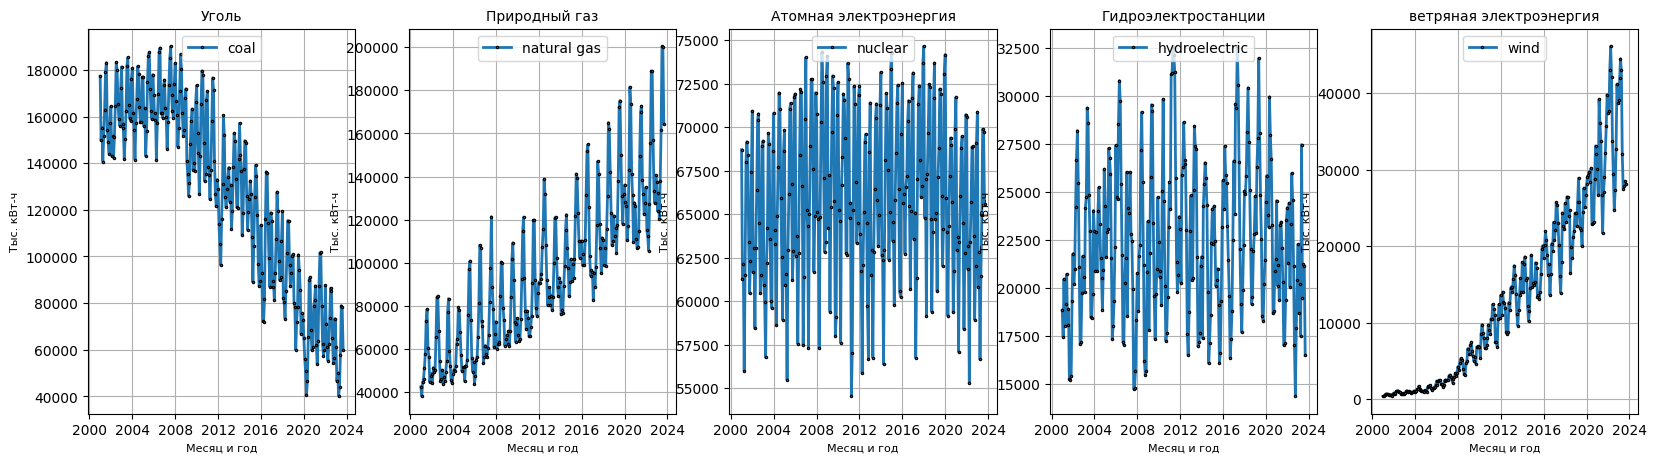

In [106]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(1,5)

ax1.plot(data['month'], data['coal thousand megawatthours'], label='coal')
ax1.set_xlabel('Месяц и год')
ax1.set_ylabel('Тыс. кВт-ч')
ax1.set_title('Уголь')
ax1.legend(loc='upper center')
ax1.grid_color = 'mistyrose'
ax1.grid_linewidth = small

ax2.plot(data['month'], data['natural gas thousand megawatthours'], label='natural gas')
ax2.set_xlabel('Месяц и год')
ax2.set_ylabel('Тыс. кВт-ч')
ax2.set_title('Природный газ')
ax2.legend(loc='upper center')
ax2.grid_color = 'mistyrose'
ax2.grid_linewidth = small

ax3.plot(data['month'], data['nuclear thousand megawatthours'], label='nuclear')
ax3.set_xlabel('Месяц и год')
ax3.set_ylabel('Тыс. кВт-ч')
ax3.set_title('Атомная электроэнергия')
ax3.legend(loc='upper center')
ax3.grid_color = 'mistyrose'
ax3.grid_linewidth = small

ax4.plot(data['month'], data['conventional hydroelectric thousand megawatthours'], label='hydroelectric')
ax4.set_xlabel('Месяц и год')
ax4.set_ylabel('Тыс. кВт-ч')
ax4.set_title('Гидроэлектростанции')
ax4.legend(loc='upper center')
ax4.grid_color = 'mistyrose'
ax4.grid_linewidth = small

ax5.plot(data['month'], data['wind thousand megawatthours'], label='wind')
ax5.set_xlabel('Месяц и год')
ax5.set_ylabel('Тыс. кВт-ч')
ax5.set_title('ветряная электроэнергия')
ax5.legend(loc='upper center')
ax5.grid_color = 'mistyrose'
ax5.grid_linewidth = small

fig.show()

# 6. Выполнить визуализацию многомерных данных, используя t-SNE. Необходимо использовать набор данных MNIST или fashion MNIST (можно использовать и другие готовые наборы данных, где можно наблюдать разделение объектов по кластерам). Рассмотреть результаты визуализации для разных значений перплексии

In [159]:
from sklearn.manifold import TSNE
from sklearn import preprocessing
import seaborn as sns
from sklearn.datasets import load_wine

In [160]:
# Используем датасет вин из sklearn
data, target = load_wine(return_X_y=True, as_frame=True)

In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [161]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [162]:
feature_names = data.columns.to_list()

In [153]:
# Всего 13 признаков
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [163]:
# И 3 класса вина
target_names = [str(i) for i in target.unique()]
target_names

['0', '1', '2']

In [164]:
# требуется изменить данные, чтобы они были в диапазоне от 0 до 1. Если этого не сдалеть, то влияние данных с большими значениями будет неоправданно высоким
scaler = preprocessing.MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [165]:
# Требуется замерить время работы алгоритма. Хорошо бы его в массив сохранить для дальнейшего сравнения с umap
%time
T = TSNE(n_components=2, perplexity=25, random_state =123)
tsne_features = T.fit_transform(data)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs


In [166]:
DATA = data.copy()
DATA['x'] = tsne_features[:,0]
DATA['y'] = tsne_features[:,1]

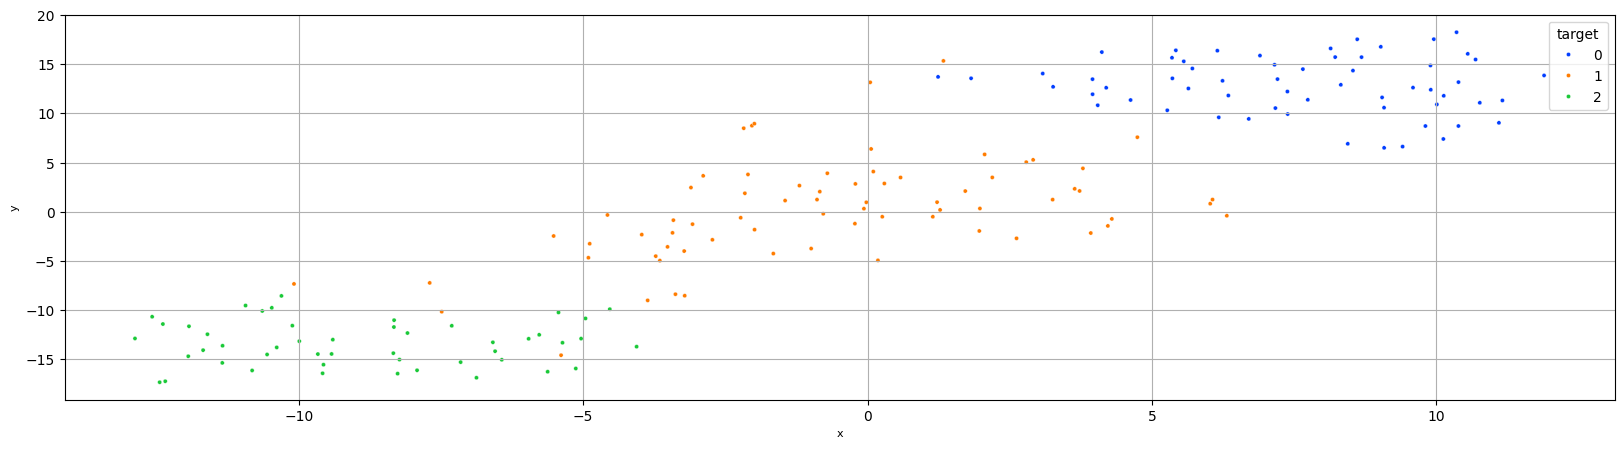

In [167]:
%matplotlib inline
fig = plt.figure()
sns.scatterplot(x='x', y='y',hue=target, data=DATA, palette='bright')
plt.show()

После каждой визуализации нужен вывод о влиянии величины перплексии на кластеризацию!

In [168]:
%time
T = TSNE(n_components=2, perplexity=5, random_state =123)
tsne_features = T.fit_transform(data)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.01 µs


In [169]:
DATA = data.copy()
DATA['x'] = tsne_features[:,0]
DATA['y'] = tsne_features[:,1]

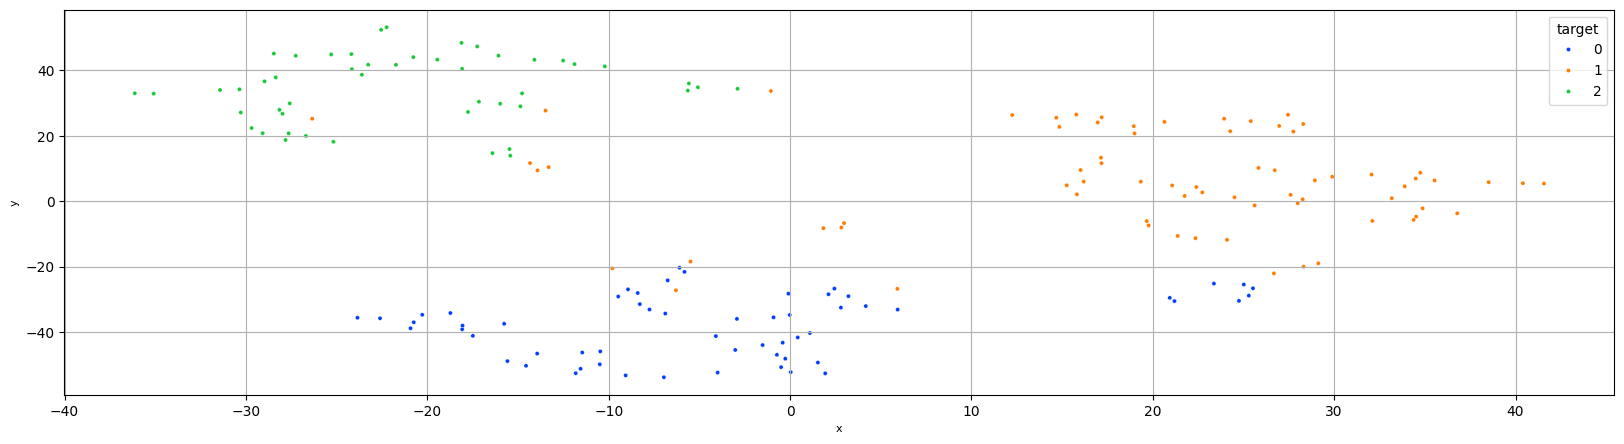

In [170]:
%matplotlib inline
fig = plt.figure()
sns.scatterplot(x='x', y='y',hue=target, data=DATA, palette='bright')
plt.show()

In [171]:
%time
T = TSNE(n_components=2, perplexity=50, random_state =123)
tsne_features = T.fit_transform(data)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 4.29 µs


In [172]:
DATA = data.copy()
DATA['x'] = tsne_features[:,0]
DATA['y'] = tsne_features[:,1]

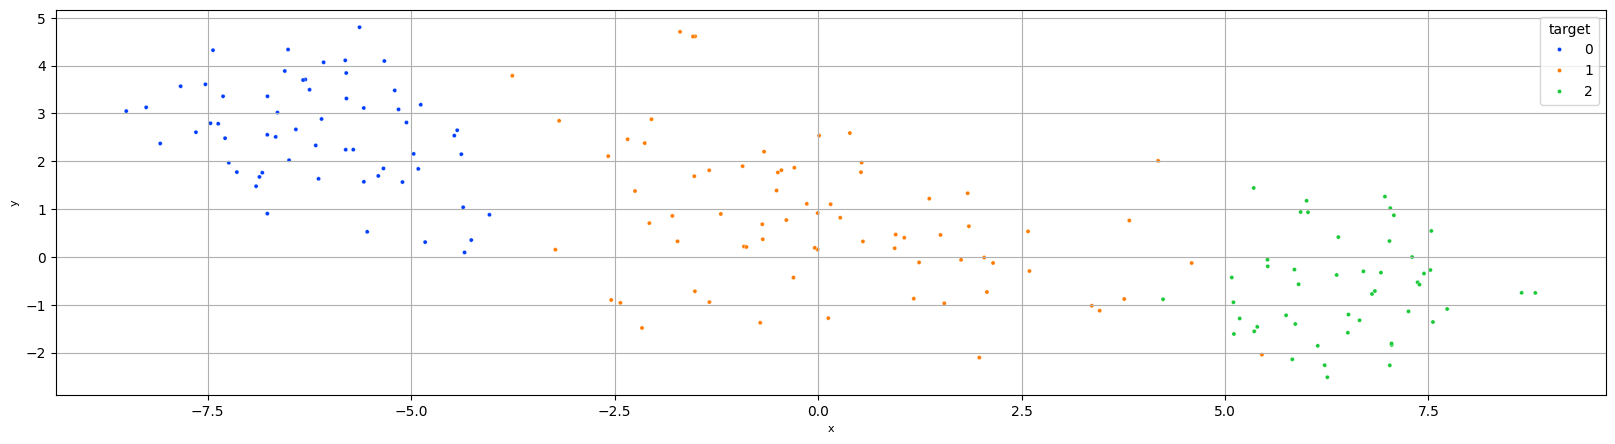

In [173]:
%matplotlib inline
fig = plt.figure()
sns.scatterplot(x='x', y='y',hue=target, data=DATA, palette='bright')
plt.show()

# 7. Выполнить визуализацию многомерных данных, используя UMAP с различными параметрами n_neighbors и min_dist. Рассчитать время работы алгоритма с помощью библиотеки time и сравнить его с временем работы t-SNE.

In [179]:
import umap

In [175]:
n_n = (5,25,50)
m_d=(0.1, 0.6)

In [177]:
DATA=data.copy()

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.3 µs


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



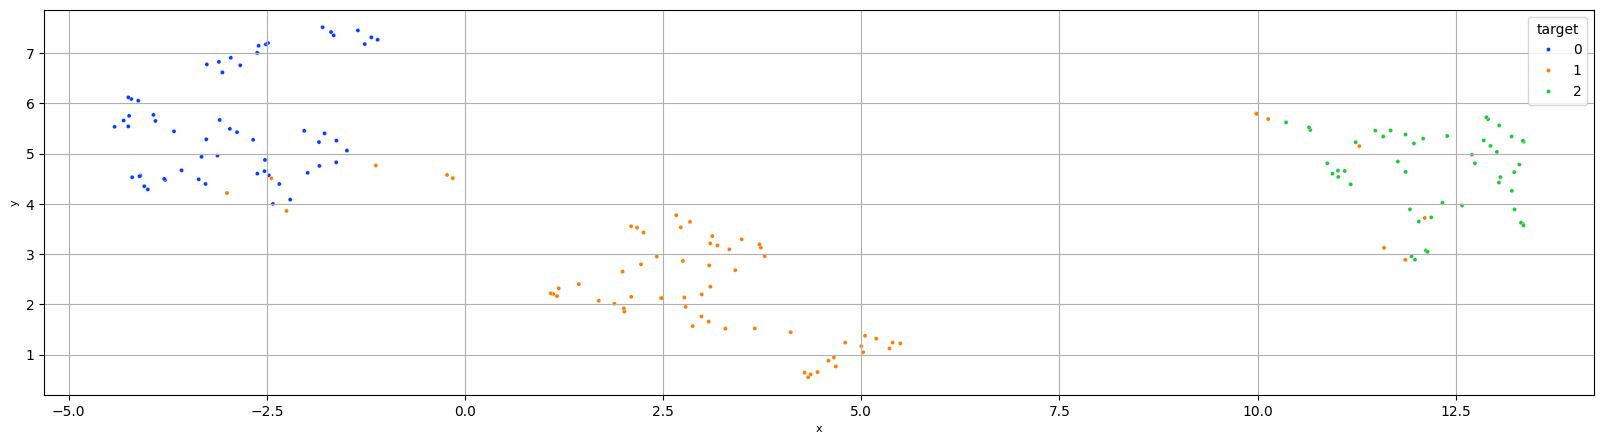

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



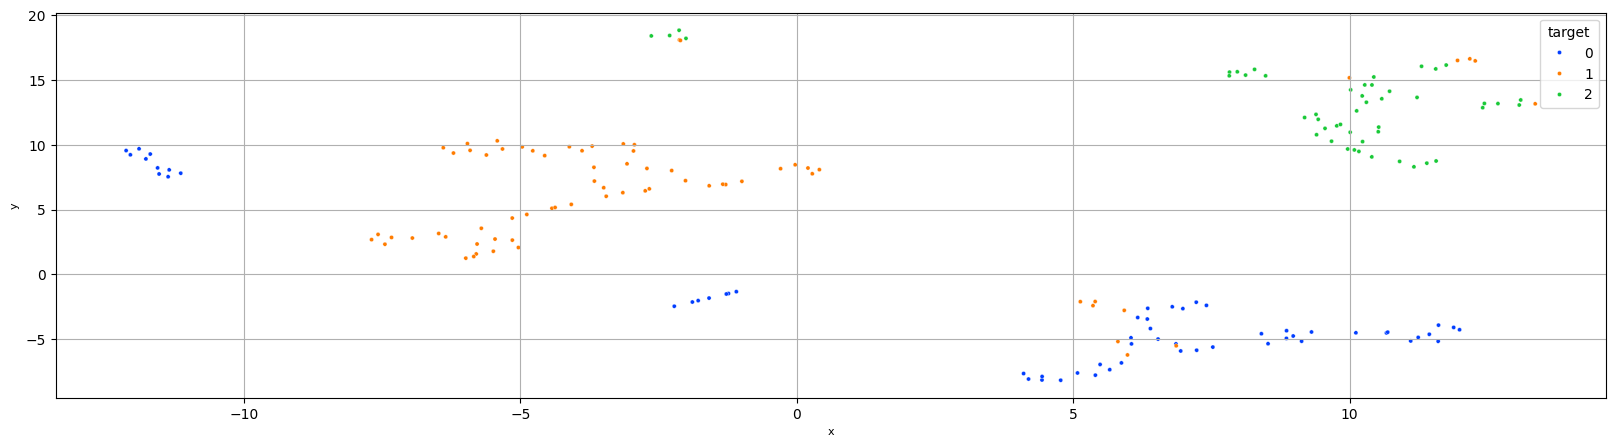

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



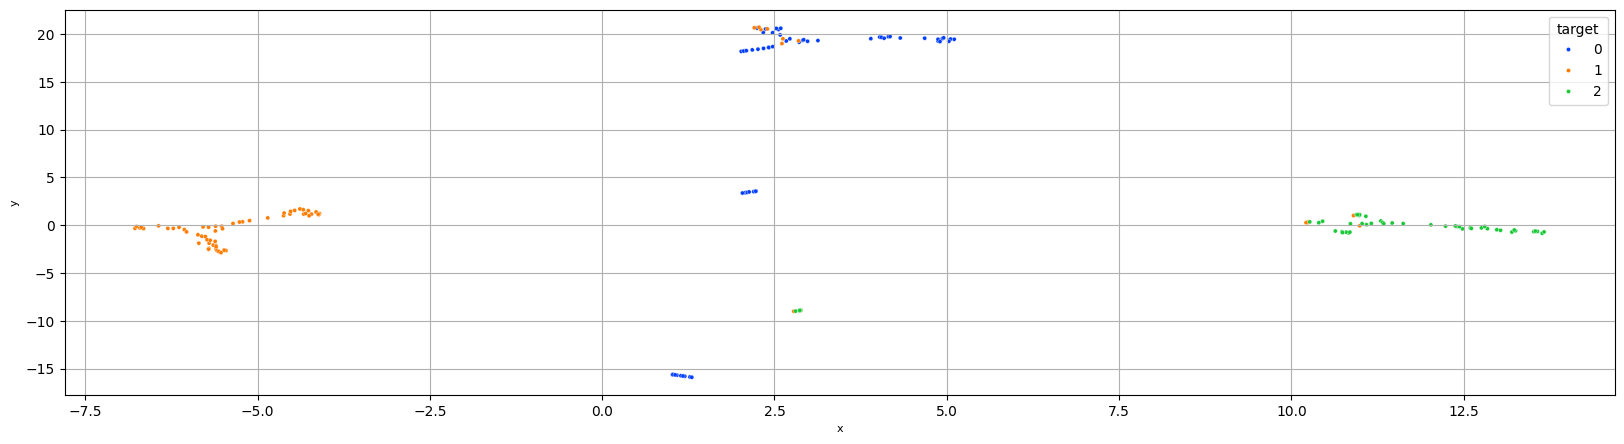

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



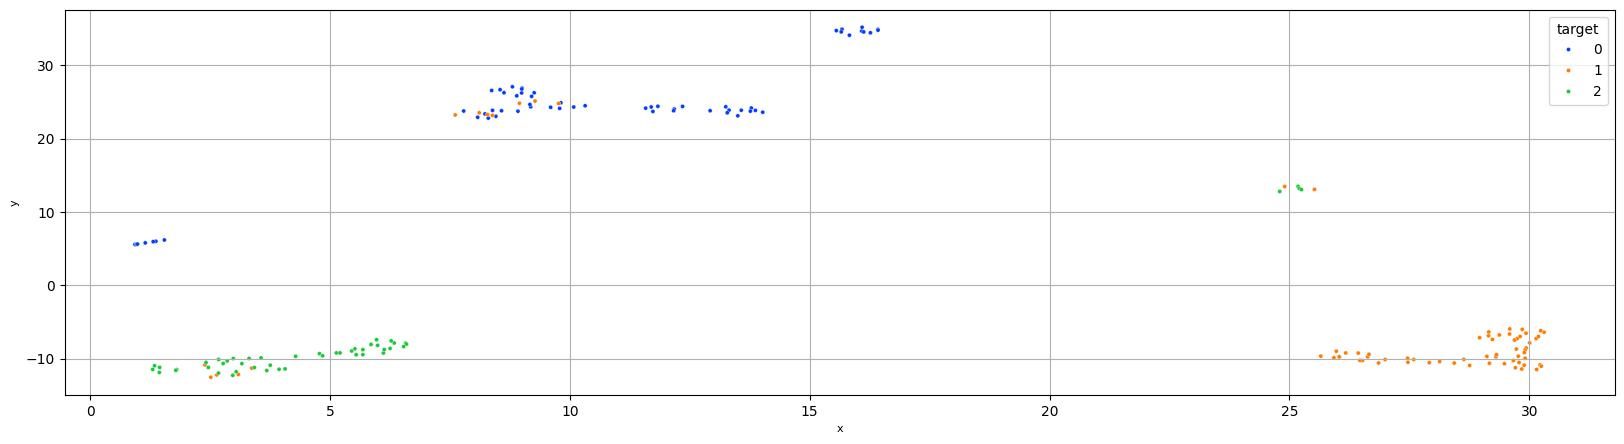

CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 8.34 µs


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



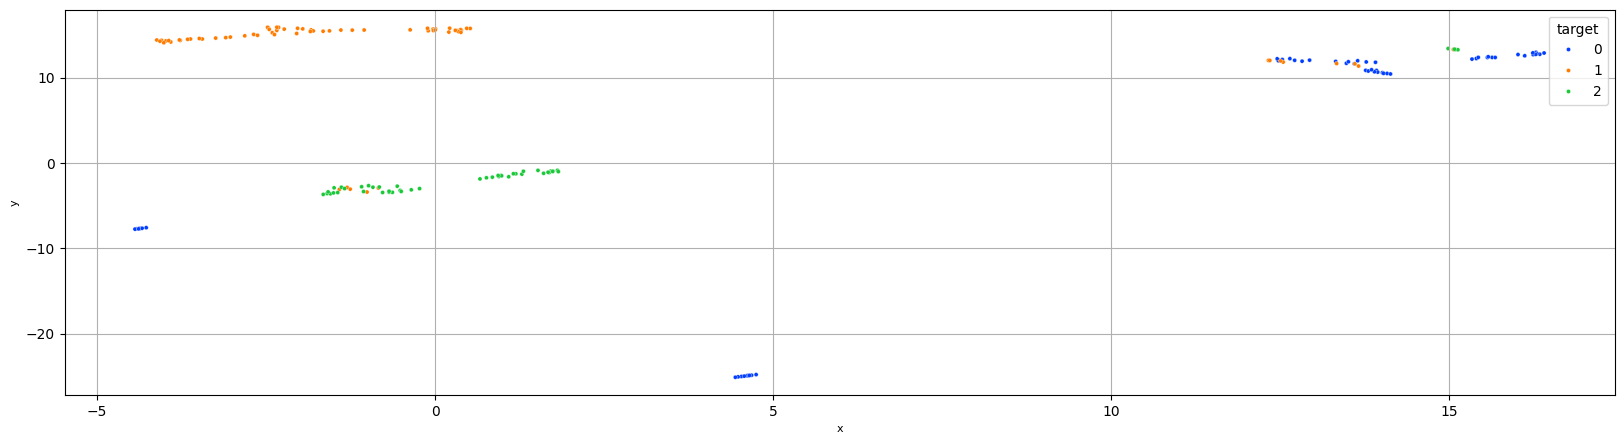

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



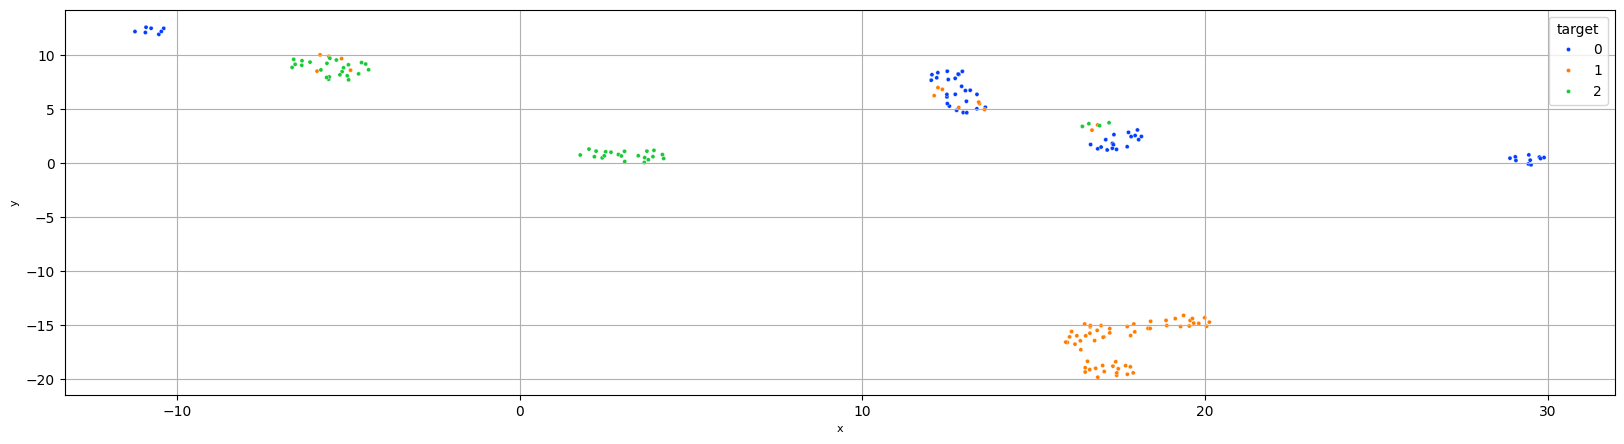

In [181]:
um=dict()
for i in range(len(n_n)):
  %time
  for j in range(len(m_d)):
    um[(n_n[i], m_d[j])] = (umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(DATA))
    DATA['x'] = um[(n_n[i], m_d[j])][:,0]
    DATA['y'] = um[(n_n[i], m_d[j])][:,1]
    %matplotlib inline
    fig = plt.figure()
    sns.scatterplot(x='x', y='y',hue=target, data=DATA, palette='bright')
    plt.show()

8. На основе проделанной работы составить отчёт с описанием и скриншотами полученных результатов, сделать выводы о выбранных данных на основе полученных графиков, сравнить библиотеки. Начиная с 6 пункта отчёт дополнительно должен содержать результаты визуализации для разных значений параметров и выводы

Выводы по сравнению рабботы TSNE и uMAP!И можно сделать визуализацию в виде таблицы с закрашенными ячейками, по обоим алгоритмам с разными значениями параметров